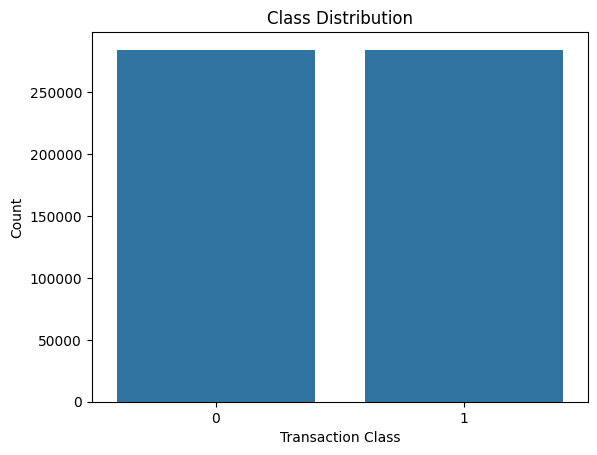

Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Below is us loading and exploring the dataset intially

#Read the data
df = pd.read_csv('../data/creditcard_2023.csv')

#print(df.head())
#print(df.info())
#print(df['Class'].value_counts())

#Check if this thing really is already balanced
#df['Class'].value_counts(normalize=True)

# Class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

# Optional: Show percentages to see the balance of the dataset
fraud_ratio = df['Class'].value_counts(normalize=True)
print(fraud_ratio)


Series([], dtype: int64)
Any missing values in dataset? False


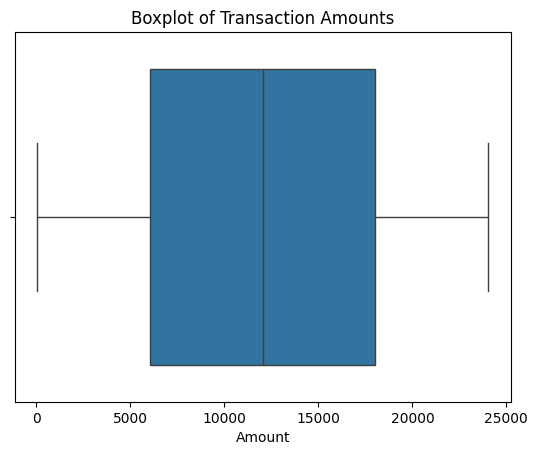

count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64
473871    24039.93
85369     24039.93
15509     24039.88
182117    24039.85
376626    24039.82
515776    24039.76
436922    24039.61
137650    24039.55
32125     24039.55
241276    24039.53
Name: Amount, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize Class distribution

#sns.countplot(x='Class', data=df)  # Show imbalance

# Plot distributions for some V features
#df['V1'].hist(bins=50)

#df['V1'].hist(bins=50)
#plt.title("Distribution of V1")
#plt.xlabel("V1 Value")
#plt.ylabel("Frequency")
#plt.show()

#Check for any missing values within the given dataset

# Missing values per column
missing = df.isnull().sum()
print(missing[missing > 0])  # Only show columns with missing values

# Overall check
print("Any missing values in dataset?", df.isnull().values.any())

#Check and visualize any outliers
sns.boxplot(x='Amount', data=df, orient='h')
plt.title("Boxplot of Transaction Amounts")
plt.show()


#Further check, becasue this data set is definitley pre processed lol
print(df['Amount'].describe())
print(df['Amount'].sort_values(ascending=False).head(10))


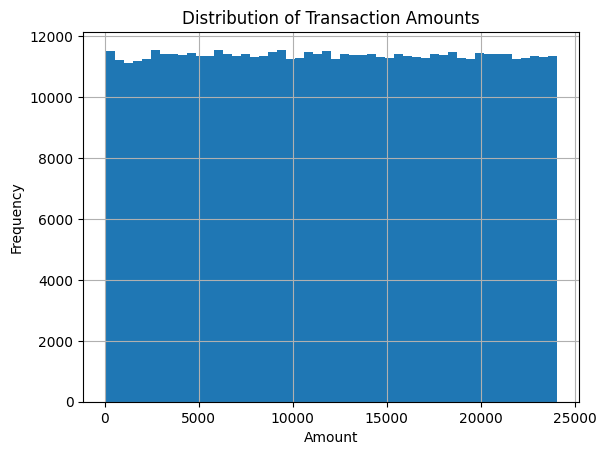

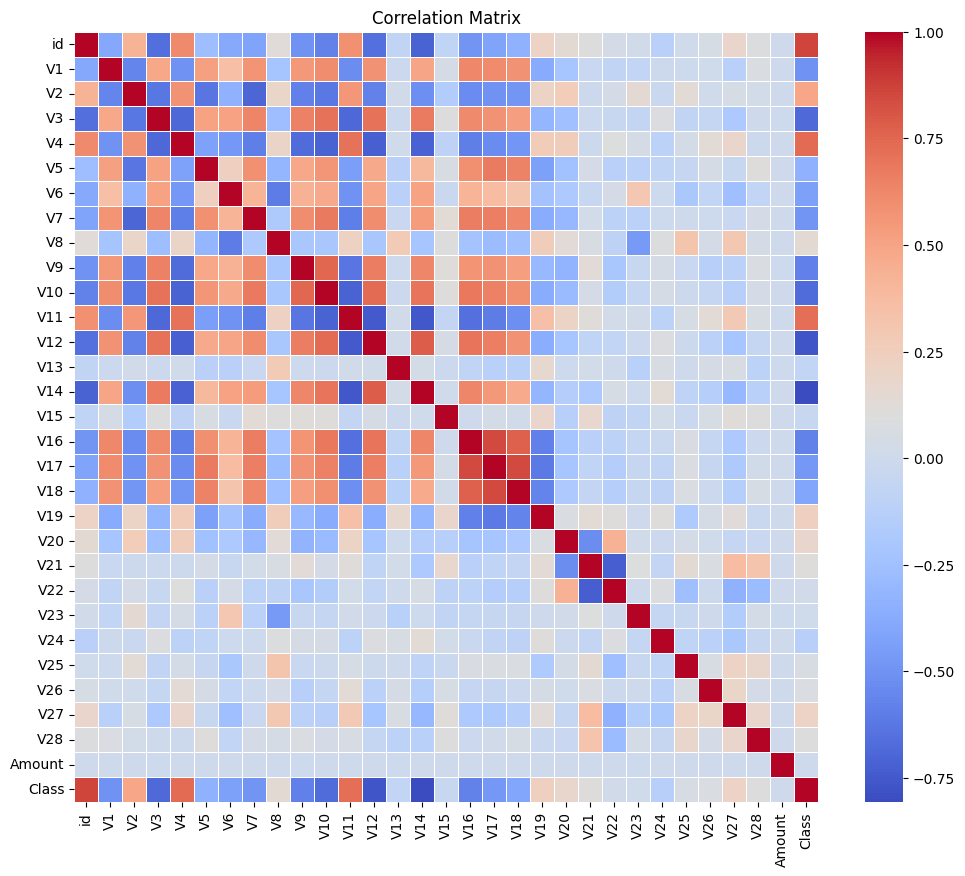

In [ ]:
#Distribution of features
df['Amount'].hist(bins=50)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

#Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [20]:
#Data preprocessing and Feature preparation

#Scale amount column. Keeping all features V1-V28 to a similar scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(columns=['Amount'])  # optional, to avoid duplicate info

#Seperate features from labels:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


#Evaluate feature importance
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train, y_train)
importances = model.feature_importances_


KeyError: "None of [Index(['Amount'], dtype='object')] are in the [columns]"

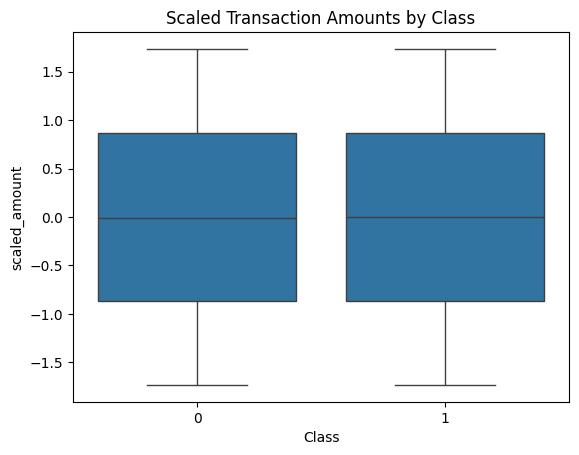

In [ ]:
#Visualize fraud by amount
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Class', y='scaled_amount', data=df)
plt.title("Scaled Transaction Amounts by Class")
plt.show()

#based on this, amount isnt necessarily a strong feature for predicting fraud

In [22]:
#Train a Logistic regression model

from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)